In [23]:
import random, warnings
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from torch.autograd import Variable

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

from synexp import *
from viz import *
from model import *

y0_pdf = 'sinusoid'
y1_pdf = 'low_base_rate_sinusoid'
pi_pdf = 'linear'

## Parameter Estimation Experiment

In [24]:
# Example code invoking experiemnt setup functions
expdf, error_params = generate_syn_data(
    NS=5000,
    y0_pdf=y0_pdf,
    y1_pdf=y1_pdf,
    pi_pdf='linear',
    error_min=0.05,
    error_max=0.25
)

# do=0
# alpha_hat, beta_hat, debug_info = ccpe(expdf, do=do)
# viz_ccpe_estimates(expdf, debug_info, error_params, do, y0_pdf, y1_pdf, pi_pdf) 

In [25]:
do = 0

yd_df = expdf[expdf['D'] == do]
X = torch.Tensor(yd_df['X'].to_numpy())
Y = torch.Tensor(yd_df['Y'].to_numpy())

traindata = torch.utils.data.TensorDataset(X, Y.unsqueeze(1))
trainloader = torch.utils.data.DataLoader(traindata,
                                          batch_size=32, shuffle=True, num_workers=1)


mlp = MLP()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)



In [12]:
do=0
yd_df = expdf[expdf['D'] == do]
yd_df.sample(frac=1).reset_index(drop=True)
X = torch.Tensor(yd_df['X'].to_numpy())[:, None]
Y = torch.Tensor(yd_df['YS_0'].to_numpy())[:, None]

print(X.size())
print(Y.size())

torch.Size([2999, 1])
torch.Size([2999, 1])


accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy ten

accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy ten

accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)
accuracy tensor(0)


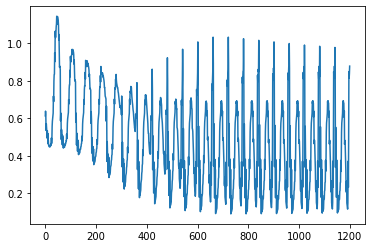

In [20]:
# X1 = torch.randn(1000, 10)
# X2 = torch.randn(1000, 10) + 1.5
# X = torch.cat([X1, X2], dim=0)
# Y1 = torch.zeros(1000, 1)
# Y2 = torch.ones(1000, 1)
# Y = torch.cat([Y1, Y2], dim=0)

net = MLP()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

e_losses = []
num_epochs = 20
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion)
plt.plot(e_losses)

In [22]:
mlp = MLP()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

for epoch in range(0, 5): # 5 epochs at maximum
    current_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        optimizer.zero_grad()
        outputs = mlp(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        
        current_loss += loss.item()
        if i % 500 == 499:
            print('Loss after mini-batch %5d: %.3f' % (i + 1, current_loss / 500))
        current_loss = 0.0



trainloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True, num_workers=1)

NameError: name 'trainloader' is not defined

In [6]:


# Run the training loop
  for epoch in range(0, 5): # 5 epochs at maximum

# Define the loss function and optimizer
# loss_function = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

## Estimator comparison experiment 
- Plot a comparison of 4 estimators: observational, conditional prob., PO oracle, PO* oracle

In [7]:
NS = 5000
N_RUNS = 5

results = {
    'model': [],
    'AU-ROC': []
}

for RUN in range(N_RUNS):

    expdf, error_params = generate_syn_data(
        NS,
        y0_pdf='sinusoid',
        y1_pdf='low_base_rate_sinusoid',
        pi_pdf='linear',
        error_min=0.05,
        error_max=0.25
    )

    run_results = run_experiment(expdf, do=0)
    results['model'].extend(run_results['model'])
    results['AU-ROC'].extend(run_results['AU-ROC'])
    
resultdf = pd.DataFrame(results)

##  Parameter estimation experiment 
- Plot parameter estimation error as a function of sample size

In [4]:
NS = 5000
N_RUNS = 15

results = []
SAMPLE_SIZES = [2000, 4000, 6000, 8000, 10000, 20000]

for NS in SAMPLE_SIZES:
    for RUN in range(N_RUNS):
        expdf, error_params = generate_syn_data(
            NS,
            y0_pdf=y0_pdf,
            y1_pdf=y1_pdf,
            pi_pdf=pi_pdf,
            error_min=0.05,
            error_max=0.25
        )

        exp_result = run_param_estimation_exp(expdf, error_params)    
        results.append(exp_result)


<AxesSubplot:xlabel='NS'>

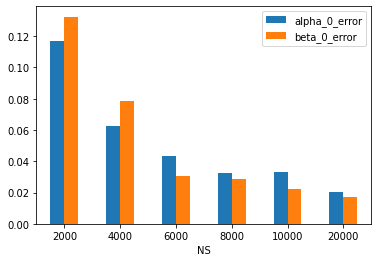

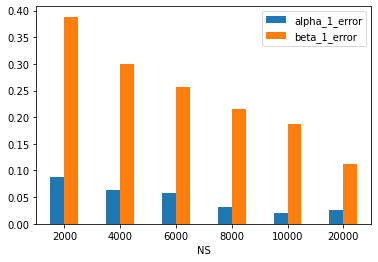

In [8]:
# Plot sanity check -- assert error converges as sample size increases

estimation_df = pd.DataFrame(results)
meandf = estimation_df.groupby('NS').mean()
meandf[['alpha_0_error', 'beta_0_error']].plot.bar(rot=0)
meandf[['alpha_1_error', 'beta_1_error']].plot.bar(rot=0)

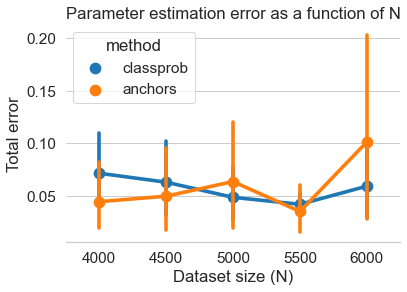

In [10]:
runslog = pd.DataFrame(runs)
data = pd.melt(runslog, id_vars=['N', 'alpha', 'beta', 'alpha_hat', 'beta_hat', 'total_error', 'method'],
        value_vars=['alpha_error', 'beta_error'], value_name='error')

data = data[data['variable'] == 'alpha_error']
sns.pointplot(data=data, x='N', y='error', hue='method')
plt.ylabel('Total error')
plt.xlabel('Dataset size (N)')
plt.title('Parameter estimation error as a function of N')
sns.despine(left=True)

